## Evaluation of the progress towards SDG goal (No.7 )


In [1]:
%run helper.py

In [11]:
# Data Preparation

df = pd.read_csv("Dataset/global-data-on-sustainable-energy (1).csv")
df.info() 

df_co2_renewable = pd.read_csv("Dataset/co2-per-capita-vs-renewable-electricity.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [12]:
df_co2_renewable= df_co2_renewable.drop('Year', axis=1)
df_co2_renewable = df_co2_renewable.drop('time', axis=1)

data_2019 = df[df['Year'] == 2019].reset_index(drop=True)

filtered_data = pd.merge(data_2019, df_co2_renewable, on=['Entity'], how='inner')

filtered_data = filtered_data[[
        'Entity', 
        'Access to clean fuels for cooking',
        'Renewable energy share in the total final energy consumption (%)',
        'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
        'Low-carbon electricity (% electricity)',
        'World regions according to OWID'
    ]].dropna().reset_index(drop=True)

filtered_data.info()

filtered_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 6 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            162 non-null    object 
 1   Access to clean fuels for cooking                                 162 non-null    float64
 2   Renewable energy share in the total final energy consumption (%)  162 non-null    float64
 3   Energy intensity level of primary energy (MJ/$2017 PPP GDP)       162 non-null    float64
 4   Low-carbon electricity (% electricity)                            162 non-null    float64
 5   World regions according to OWID                                   162 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.7+ KB


,Entity,Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Low-carbon electricity (% electricity),World regions according to OWID
0,Afghanistan,31.9,18.51,2.41,83.177570,Asia
1,Algeria,99.7,0.16,5.32,1.095319,Africa
2,Angola,49.5,54.69,2.94,71.558440,Africa
3,Antigua and Barbuda,100.0,0.91,3.45,2.941176,North America
4,Argentina,99.9,10.74,3.35,31.991589,South America
...,...,...,...,...,...,...
157,Uruguay,100.0,60.76,2.77,88.224304,South America
158,Uzbekistan,84.6,1.57,8.37,10.763600,Asia
159,Vanuatu,8.0,31.86,3.53,28.571428,Oceania
160,Zambia,11.2,84.50,7.09,86.025900,Africa


In [13]:
# PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

# Without standardization
pca_raw = PCA(n_components=2)
pca_raw_results = pca_raw.fit_transform(filtered_data.iloc[:, 1:5])

# With standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data.iloc[:, 1:5])
pca_std = PCA(n_components=2)
pca_std_results = pca_std.fit_transform(scaled_data)

In [14]:
# MDS

from sklearn.manifold import MDS

# First configuration (random_state=42)
mds_42 = MDS(n_components=2, random_state=42)
mds_42_results = mds_42.fit_transform(filtered_data.iloc[:, 1:5])

# Second configuration (random_state=123)
mds_123 = MDS(n_components=2, random_state=123)
mds_123_results = mds_123.fit_transform(filtered_data.iloc[:, 1:5])


In [15]:
# t-SNE

from sklearn.manifold import TSNE

perplexities = [3, 10, 100]
tsne_results = {}

for perp in perplexities:
    # Seed 42
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    tsne_results[f'perp{perp}_seed42'] = tsne.fit_transform(scaled_data)
    
    # Seed 123
    tsne = TSNE(n_components=2, perplexity=perp, random_state=123)
    tsne_results[f'perp{perp}_seed123'] = tsne.fit_transform(scaled_data)


### Visualization using Dimensionality Reduction (PCA, MDS, t-SNE)

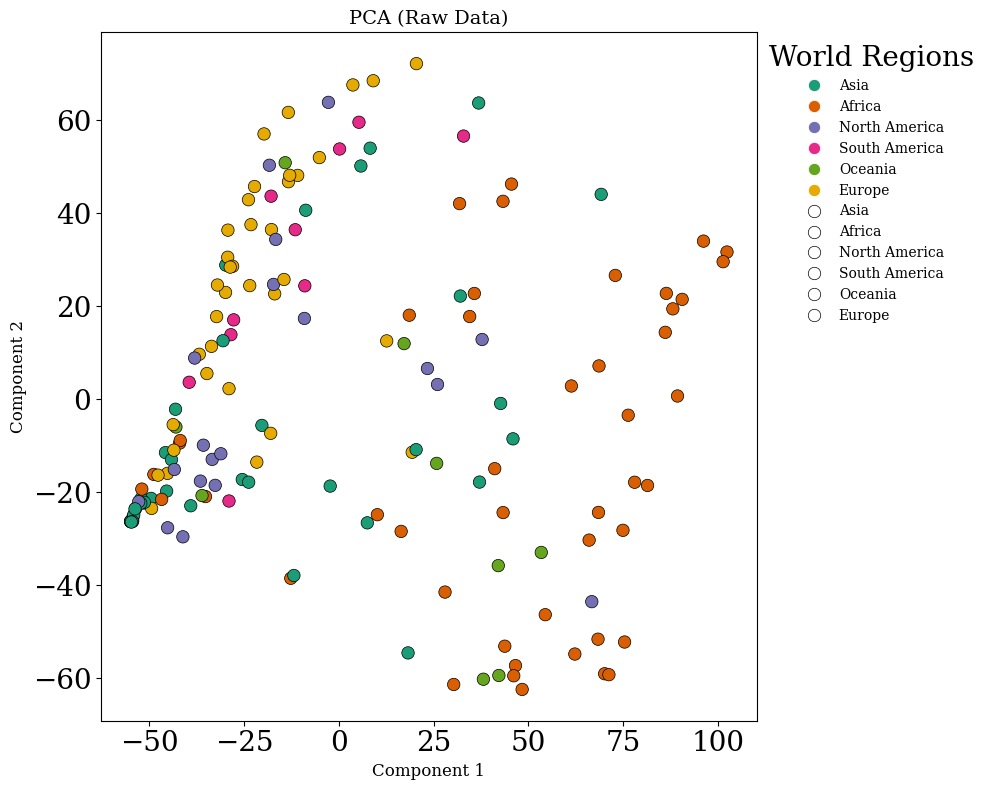

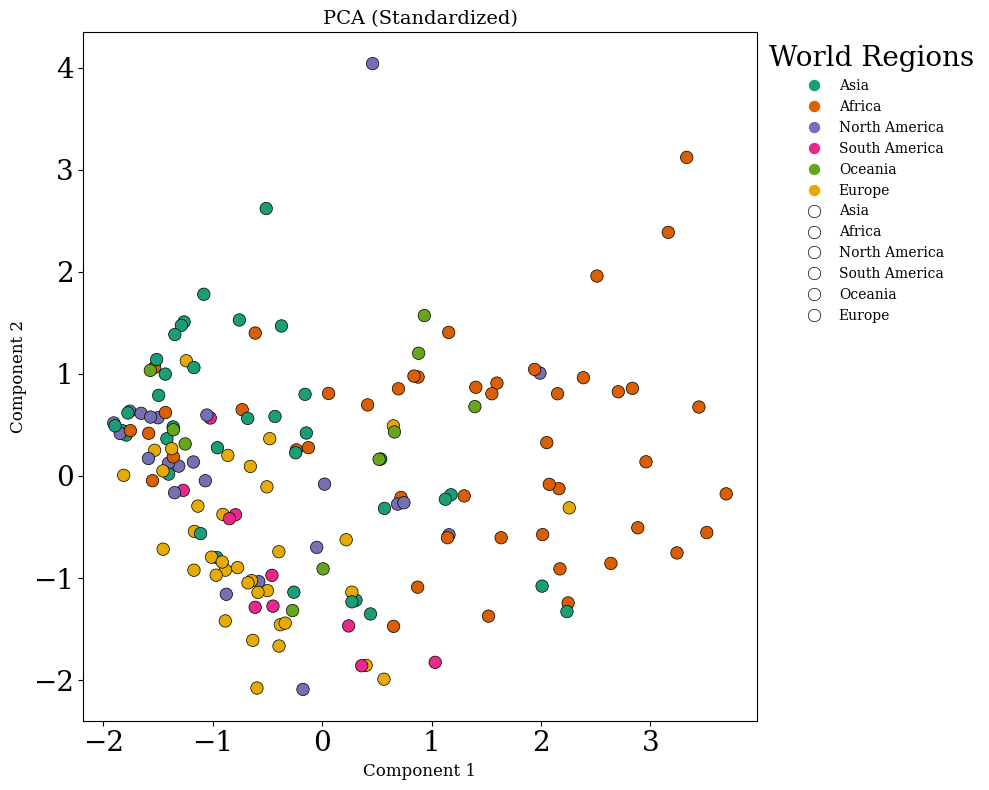

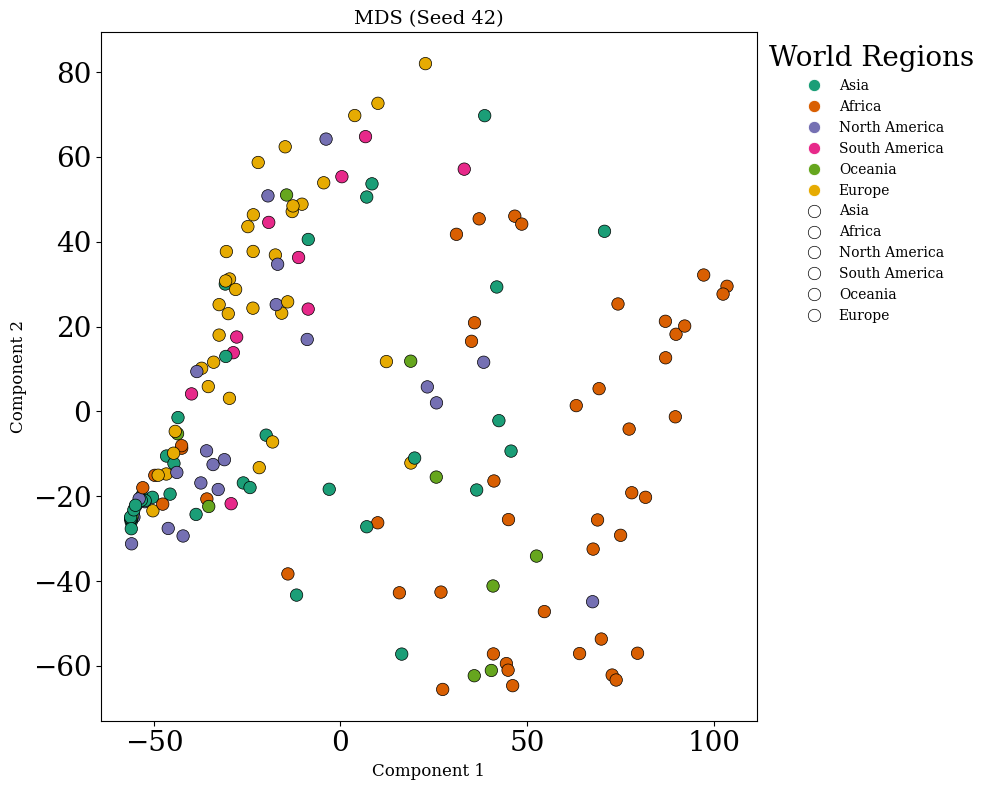

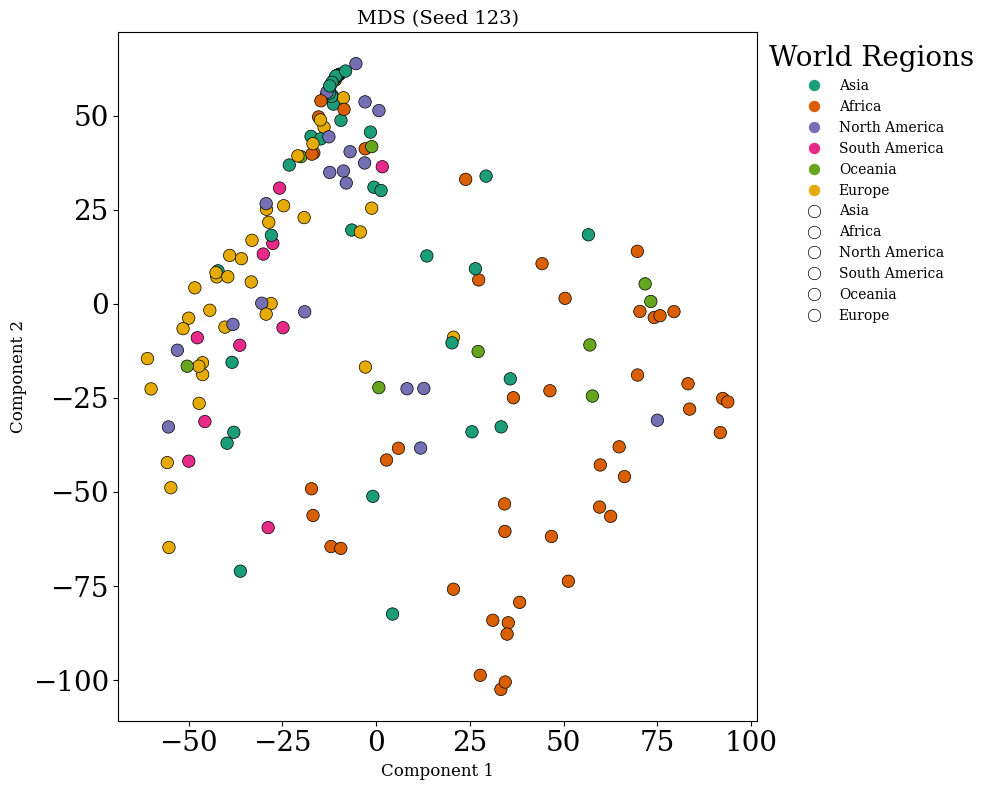

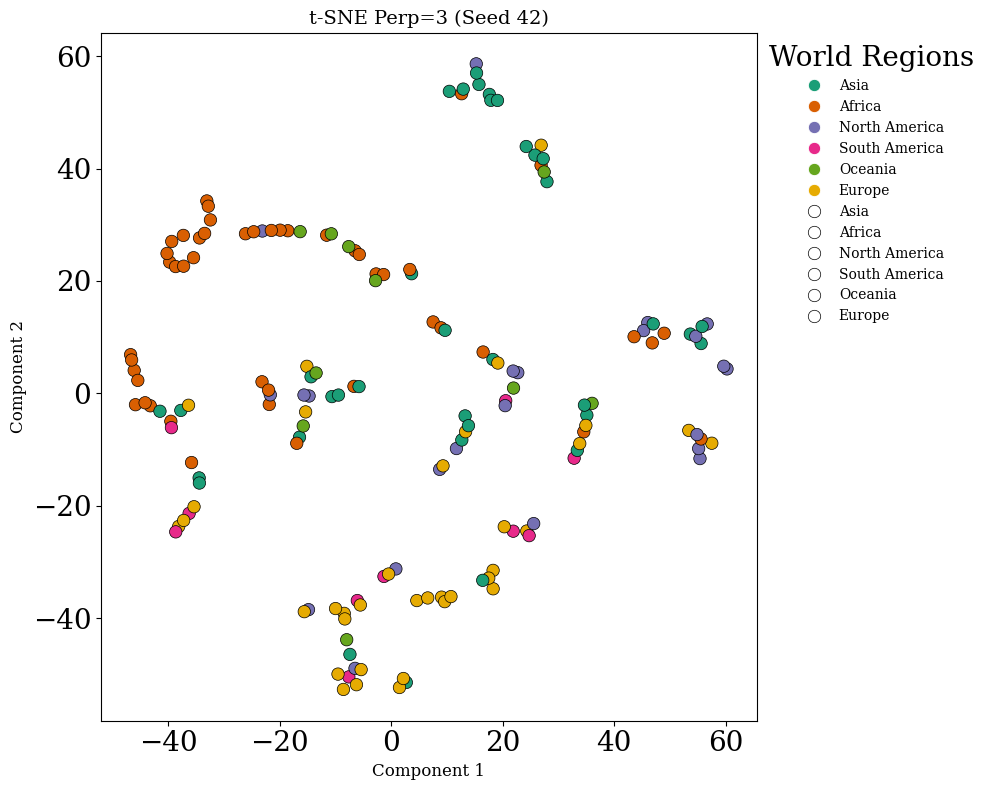

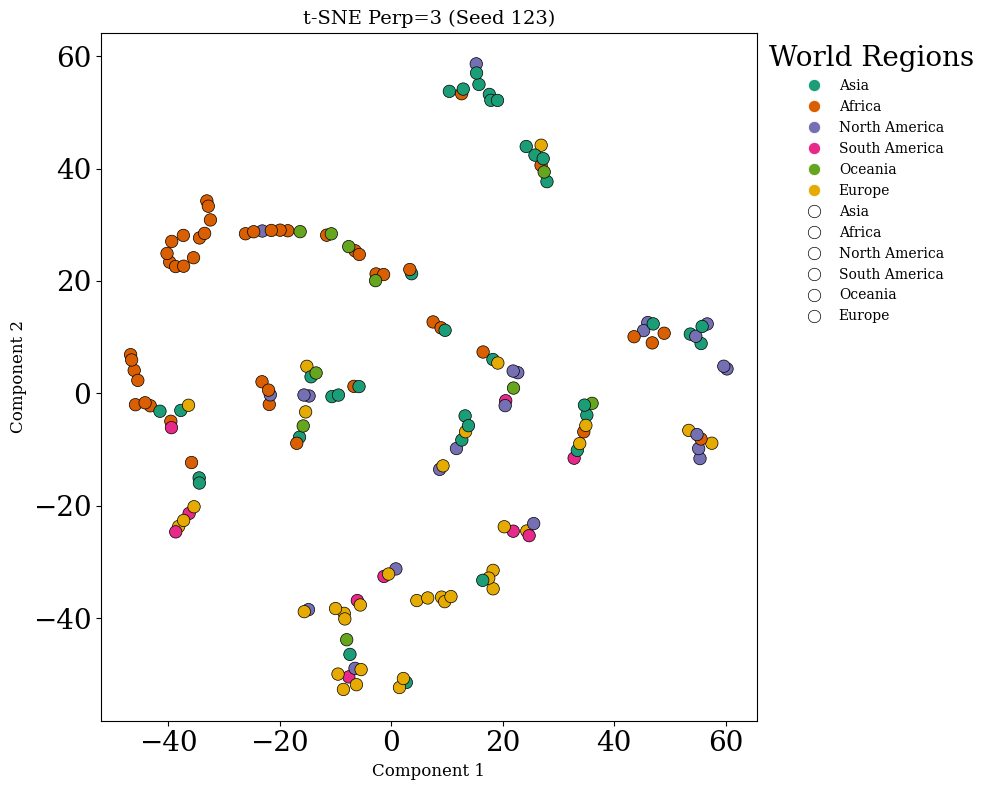

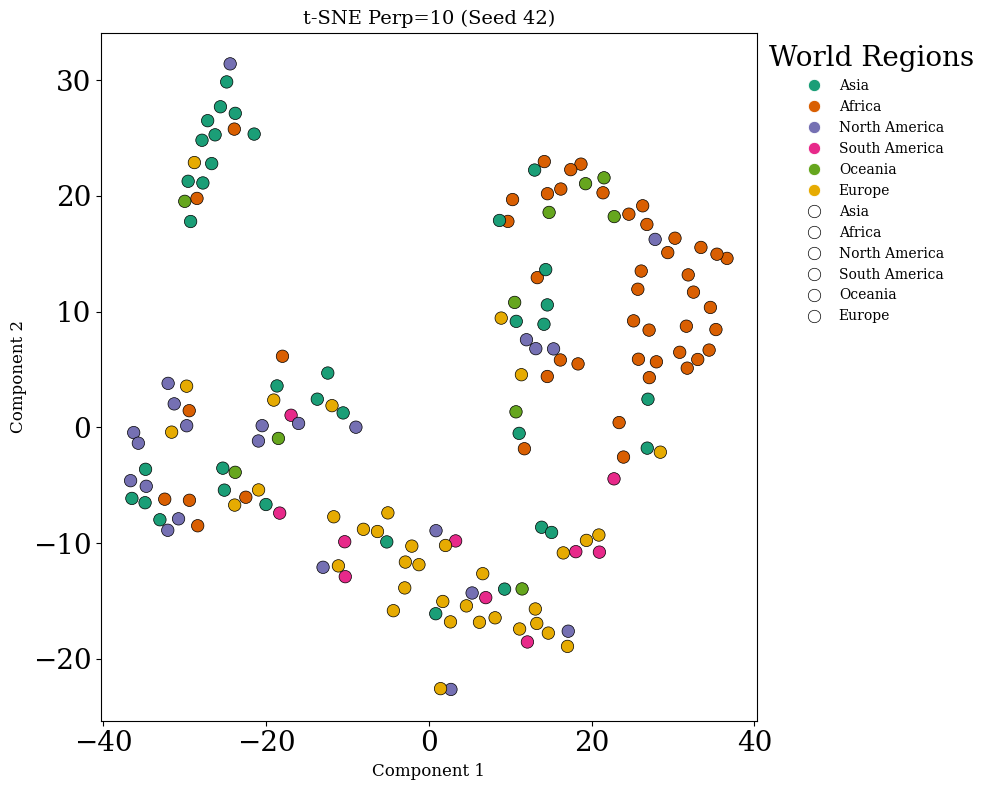

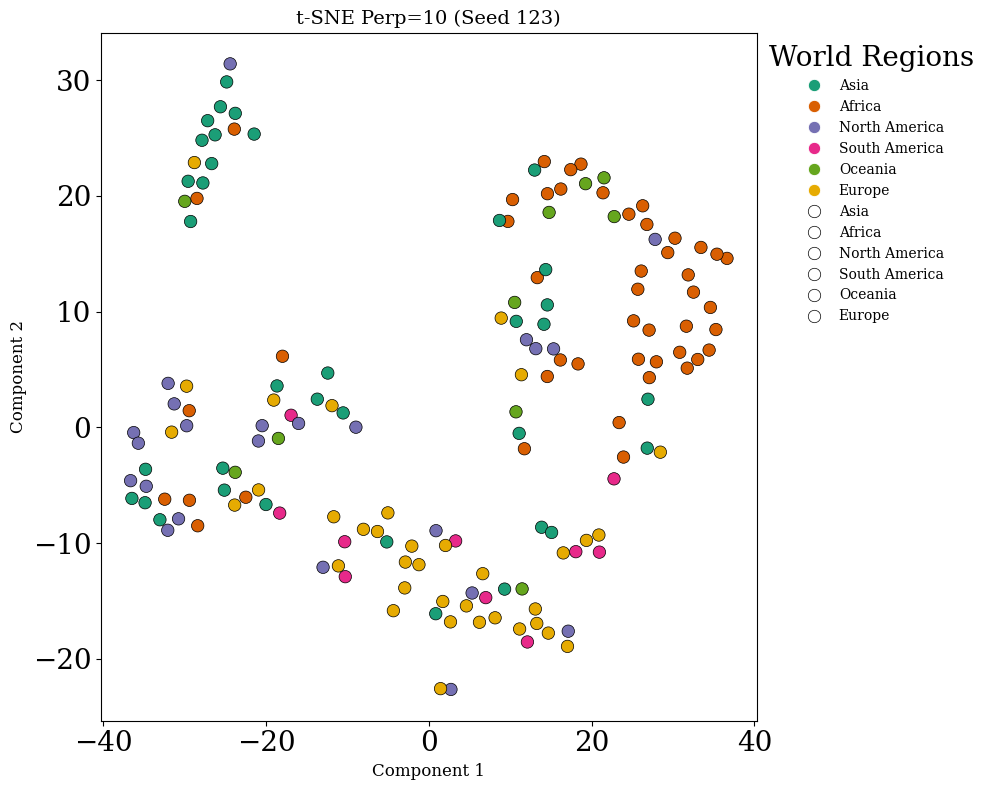

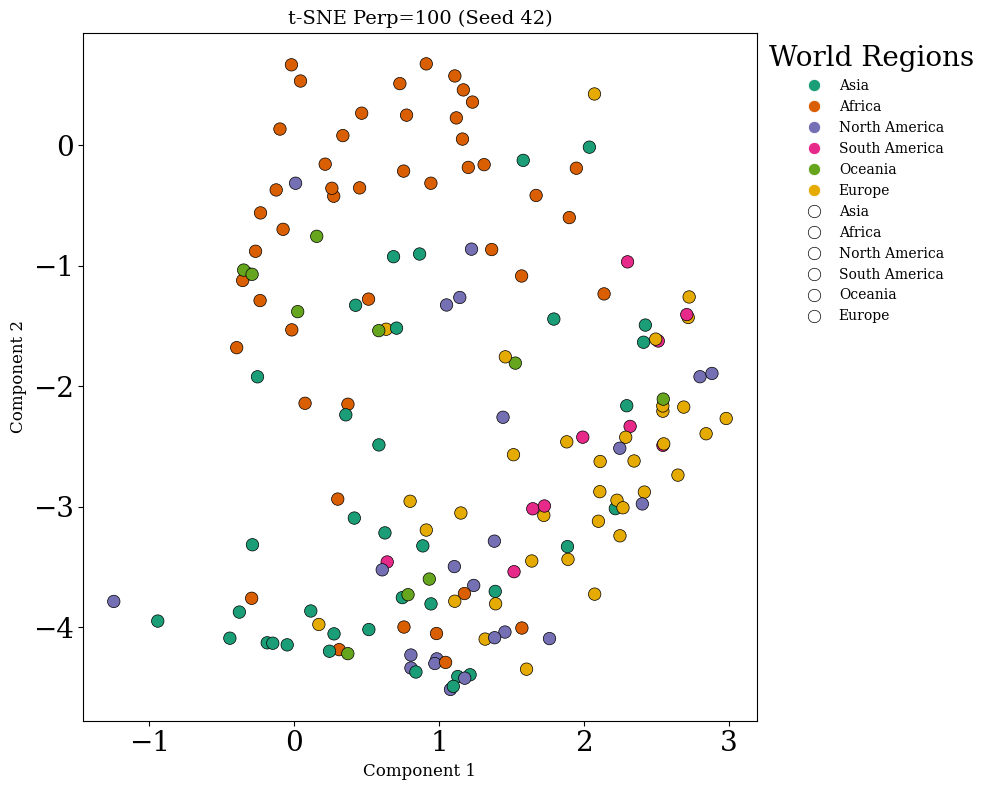

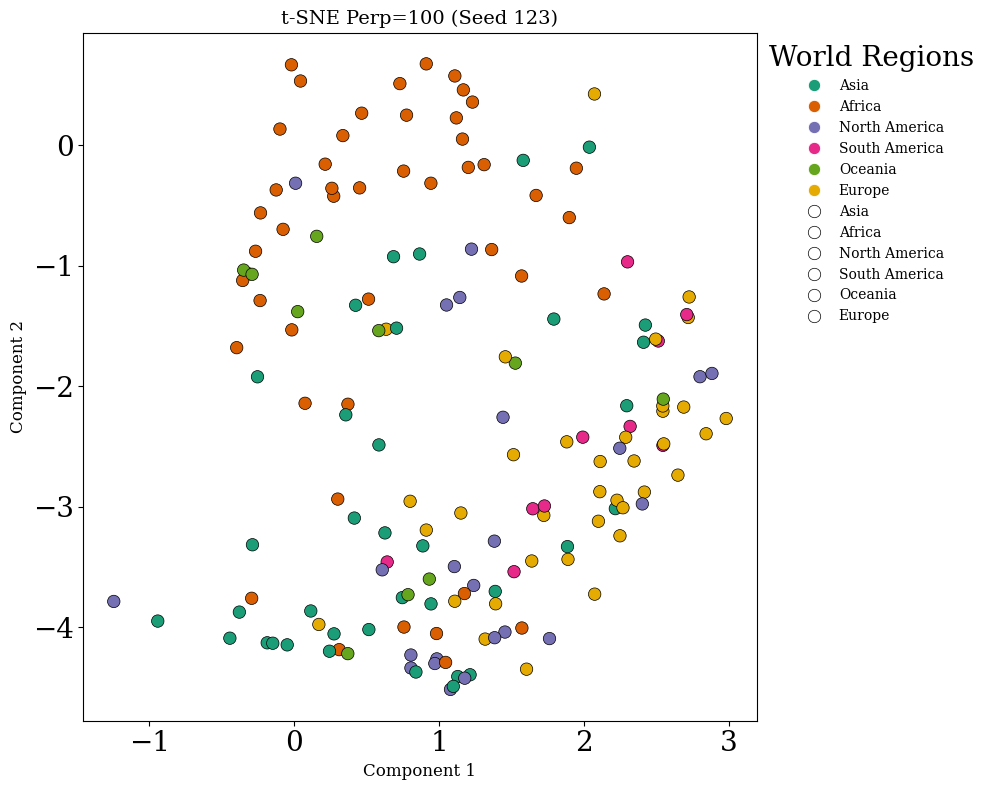

In [16]:
# Option 1: Colorblind-friendly palette
#palette = sns.color_palette("colorblind", n_colors=len(filtered_data['World regions according to OWID'].unique()))

# Option 2: Use high-contrast palette like Dark2
palette = sns.color_palette("Dark2", n_colors=len(filtered_data['World regions according to OWID'].unique()))

def plot_embedding(data, title, labels=filtered_data['Entity']):
    plt.figure(figsize=(10, 8))  # Create a new figure for each plot
    ax = plt.gca()
    
    # Use the improved palette and increase point size
    sns.scatterplot(x=data[:, 0], y=data[:, 1], ax=ax, 
                    hue=filtered_data.iloc[:,5], 
                    palette=palette,
                    s=80)  # Larger point size
    
    # Add a border to points for better distinction
    sns.scatterplot(x=data[:, 0], y=data[:, 1], ax=ax, 
                    hue=filtered_data.iloc[:,5], 
                    palette=palette,
                    s=80, facecolor='none', edgecolor='k', linewidth=0.5)
    
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Component 1', fontsize=12)
    ax.set_ylabel('Component 2', fontsize=12)
    
    # Improve legend readability
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), 
              title="World Regions", fontsize=10)
    
    plt.tight_layout()
    plt.show()

#PCA Plots
plot_embedding(pca_raw_results, 'PCA (Raw Data)')
plot_embedding(pca_std_results, 'PCA (Standardized)')

#MDS Plots
plot_embedding(mds_42_results, 'MDS (Seed 42)')
plot_embedding(mds_123_results, 'MDS (Seed 123)')

# t-SNE Plots
for perp in perplexities:
    plot_embedding(tsne_results[f'perp{perp}_seed42'], f't-SNE Perp={perp} (Seed 42)')
    plot_embedding(tsne_results[f'perp{perp}_seed123'], f't-SNE Perp={perp} (Seed 123)')


### Examining PCA Loadings for Insights

PCA Loadings:
                                                         PC1       PC2
Access to clean fuels for cooking                  -0.584099 -0.222996
Renewable energy share in total final energy co...  0.663351 -0.122006
Energy intensity level of primary energy (MJ/$2...  0.360159  0.532253
Low-carbon electricity (% electricity)              0.298462 -0.807523
Explained variance: PC1 0.51, PC2 0.27


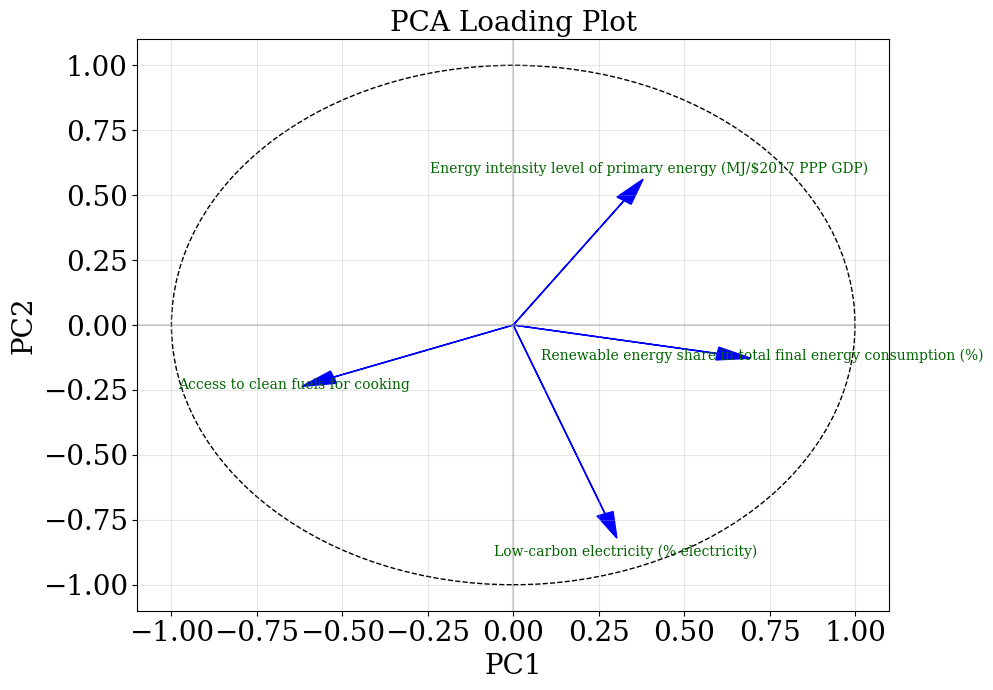

In [17]:
variables = ['Access to clean fuels for cooking',
            'Renewable energy share in total final energy consumption (%)',
            'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
            'Low-carbon electricity (% electricity)']

# Create DataFrame of loadings
loadings_df = pd.DataFrame(pca_std.components_.T, 
                          index=variables,
                          columns=['PC1', 'PC2'])

print("PCA Loadings:")
print(loadings_df)

# Also calculate explained variance
print(f"Explained variance: PC1 {pca_std.explained_variance_ratio_[0]:.2f}, "
      f"PC2 {pca_std.explained_variance_ratio_[1]:.2f}")

def plot_loadings(pca, feature_names):
    """Plot the contribution of each variable to the components"""
    loadings = pca.components_.T
    plt.figure(figsize=(10, 7))
    
    # Plot arrows
    for i, (x, y) in enumerate(loadings):
        plt.arrow(0, 0, x*0.9, y*0.9, head_width=0.05, 
                 head_length=0.1, fc='blue', ec='blue')
        plt.text(x*1.1, y*1.1, feature_names[i], 
                color='darkgreen', ha='center')
    
    # Add circle
    circle = plt.Circle((0,0), 1, fill=False, linestyle='--')
    plt.gca().add_patch(circle)
    
    plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
    plt.grid(alpha=0.3)
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Loading Plot')
    plt.tight_layout()

plot_loadings(pca_std, variables)